In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [13]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [24]:
X = df.drop(['target','flower_name'],axis=1)
y = df.target

In [16]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
len(X_train)

120

In [27]:
len(X_test)

30

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier(n_estimators=40)

In [42]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [43]:
model.score(X_test,y_test)

0.9666666666666667

In [44]:
y_predicted = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

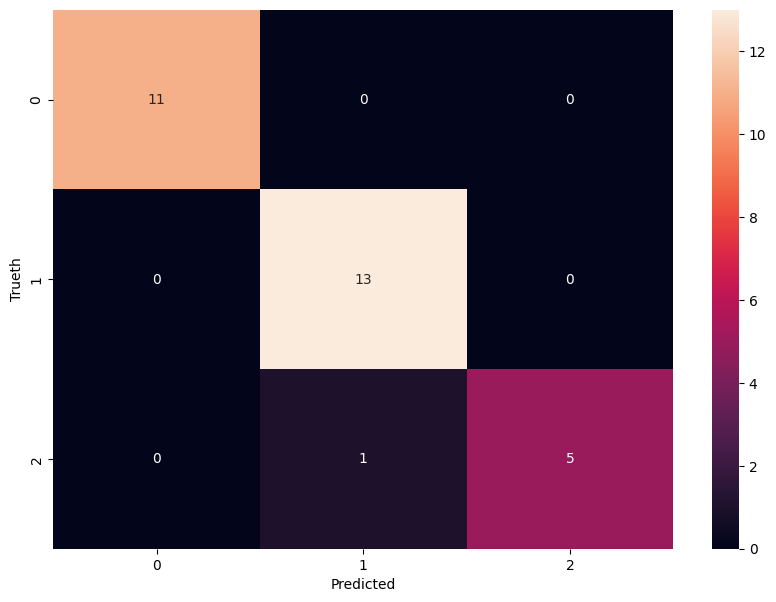

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Trueth')
plt.show()